In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder


In [3]:
df = pd.read_csv('manufacturing_quality_control.csv')
df['production_date'] = pd.to_datetime(df['production_date'])
print(df.head())


   product_id production_date product_line    shift  operator_id  \
0        3001      2024-04-15       Line_A    Night          109   
1        3002      2024-10-14       Line_A  Evening          110   
2        3003      2024-09-06       Line_B    Night          108   
3        3004      2024-03-03       Line_C  Evening          136   
4        3005      2024-02-13       Line_C  Morning          132   

   temperature_celsius  pressure_psi  humidity_percent material_grade  \
0                71.58        138.57             48.14              C   
1                75.31        160.18             42.44              A   
2                69.88        151.76             32.52              C   
3                78.54        146.76             23.30              B   
4                70.24        166.03             40.69              B   

   production_time_minutes  dimension_length_mm  dimension_width_mm  \
0                    49.92                99.26               48.23   
1         

In [4]:
print(df.describe())
print(df['pass_fail'].value_counts())


        product_id      production_date  operator_id  temperature_celsius  \
count  1200.000000                 1200  1200.000000          1200.000000   
mean   3600.500000  2024-06-29 20:37:12   125.525833            75.100817   
min    3001.000000  2024-01-01 00:00:00   101.000000            60.570000   
25%    3300.750000  2024-03-30 00:00:00   112.000000            71.707500   
50%    3600.500000  2024-06-23 00:00:00   126.000000            75.030000   
75%    3900.250000  2024-09-30 00:00:00   139.000000            78.347500   
max    4200.000000  2024-12-30 00:00:00   150.000000            93.880000   
std     346.554469                  NaN    14.552978             4.961334   

       pressure_psi  humidity_percent  production_time_minutes  \
count   1200.000000       1200.000000              1200.000000   
mean     150.370500         44.976592                44.948475   
min      120.770000         13.310000                21.180000   
25%      143.582500         39.705000     

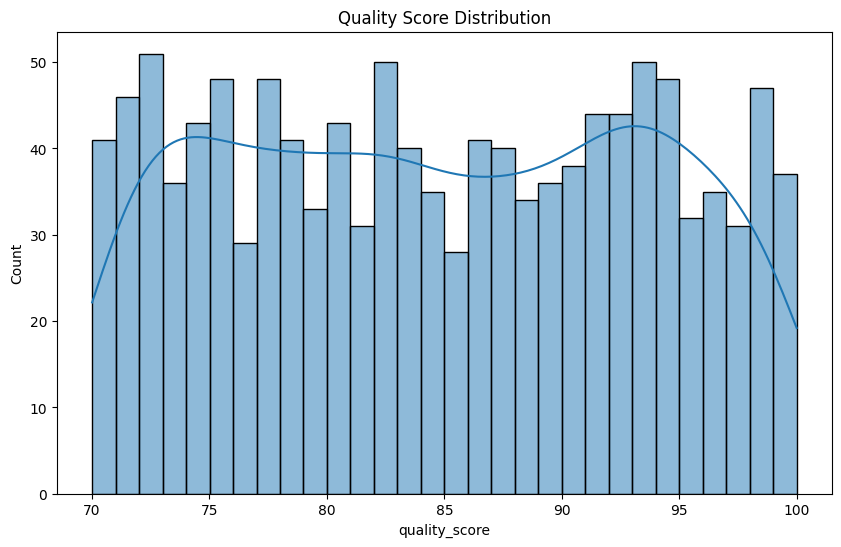

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['quality_score'], bins=30, kde=True)
plt.title('Quality Score Distribution')
plt.show()


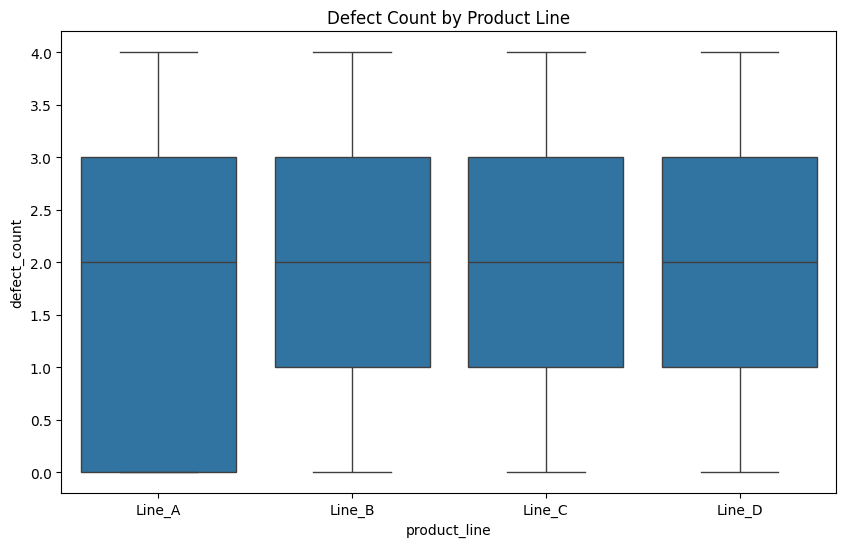

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(x='product_line', y='defect_count', data=df)
plt.title('Defect Count by Product Line')
plt.show()


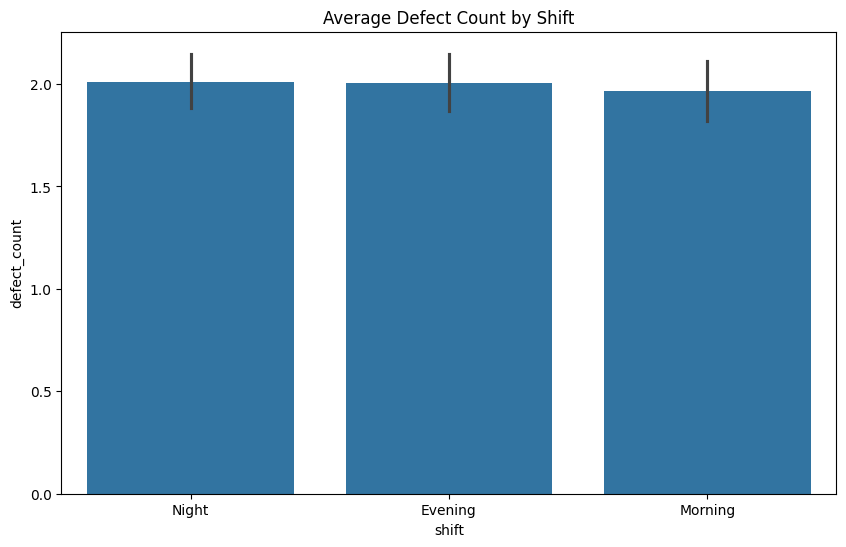

In [7]:
plt.figure(figsize=(10,6))
sns.barplot(x='shift', y='defect_count', data=df)
plt.title('Average Defect Count by Shift')
plt.show()


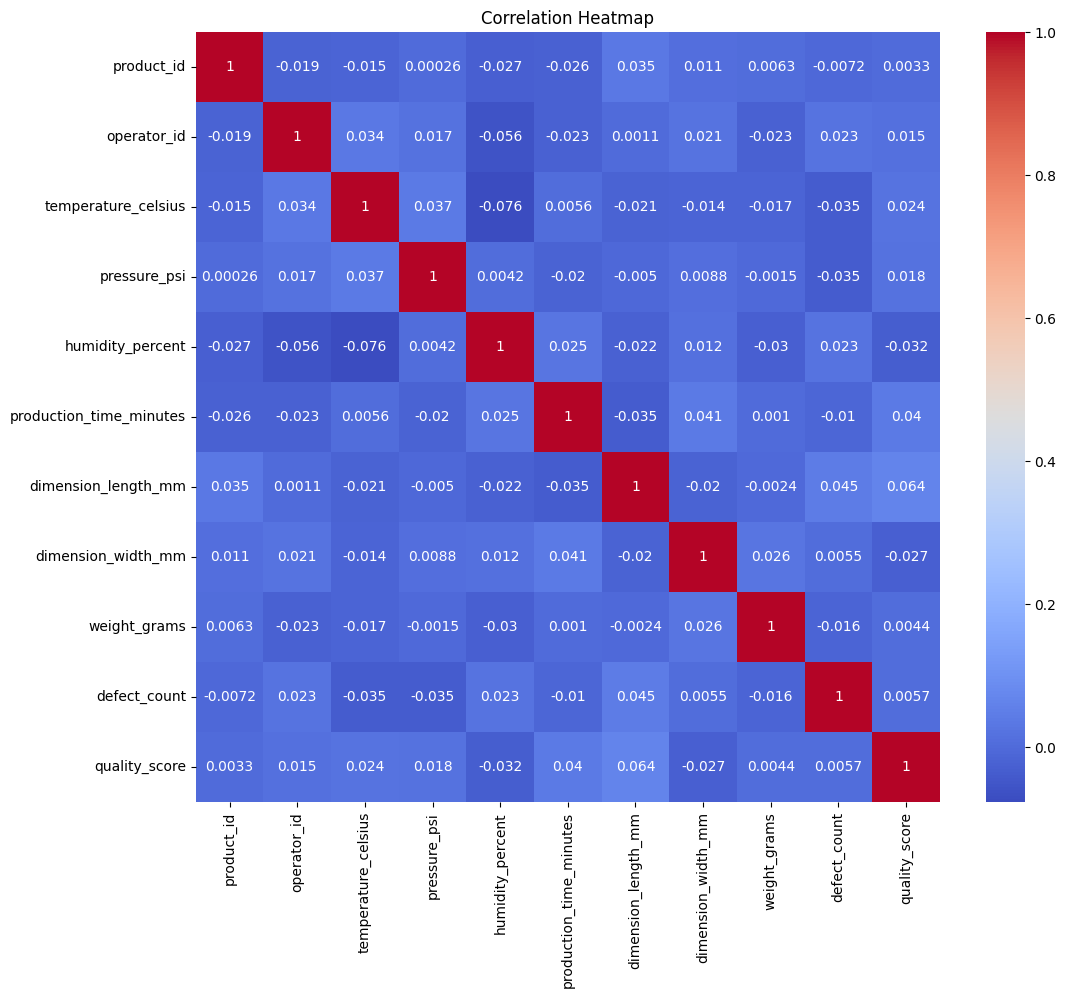

In [9]:
plt.figure(figsize=(12,10))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [10]:
le_product_line = LabelEncoder()
le_shift = LabelEncoder()
le_material_grade = LabelEncoder()
le_pass_fail = LabelEncoder()

df['product_line_encoded'] = le_product_line.fit_transform(df['product_line'])
df['shift_encoded'] = le_shift.fit_transform(df['shift'])
df['material_grade_encoded'] = le_material_grade.fit_transform(df['material_grade'])
df['pass_fail_encoded'] = le_pass_fail.fit_transform(df['pass_fail'])


In [11]:
feature_cols = ['temperature_celsius', 'pressure_psi', 'humidity_percent',
 'production_time_minutes', 'dimension_length_mm', 'dimension_width_mm',
 'weight_grams', 'product_line_encoded', 'shift_encoded', 'material_grade_encoded', 'operator_id']

X = df[feature_cols]
y = df['pass_fail_encoded']


In [13]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred, target_names=le_pass_fail.classes_))

              precision    recall  f1-score   support

        Fail       0.00      0.00      0.00        37
        Pass       0.88      1.00      0.93       263

    accuracy                           0.88       300
   macro avg       0.44      0.50      0.47       300
weighted avg       0.77      0.88      0.82       300



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


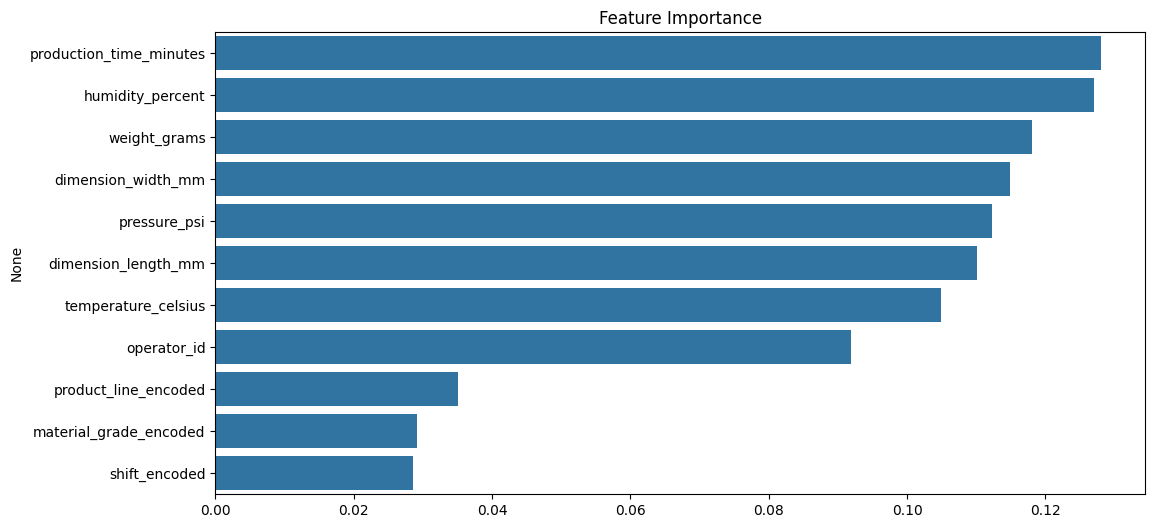

In [14]:
feat_importance = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=feat_importance.values, y=feat_importance.index)
plt.title('Feature Importance')
plt.show()


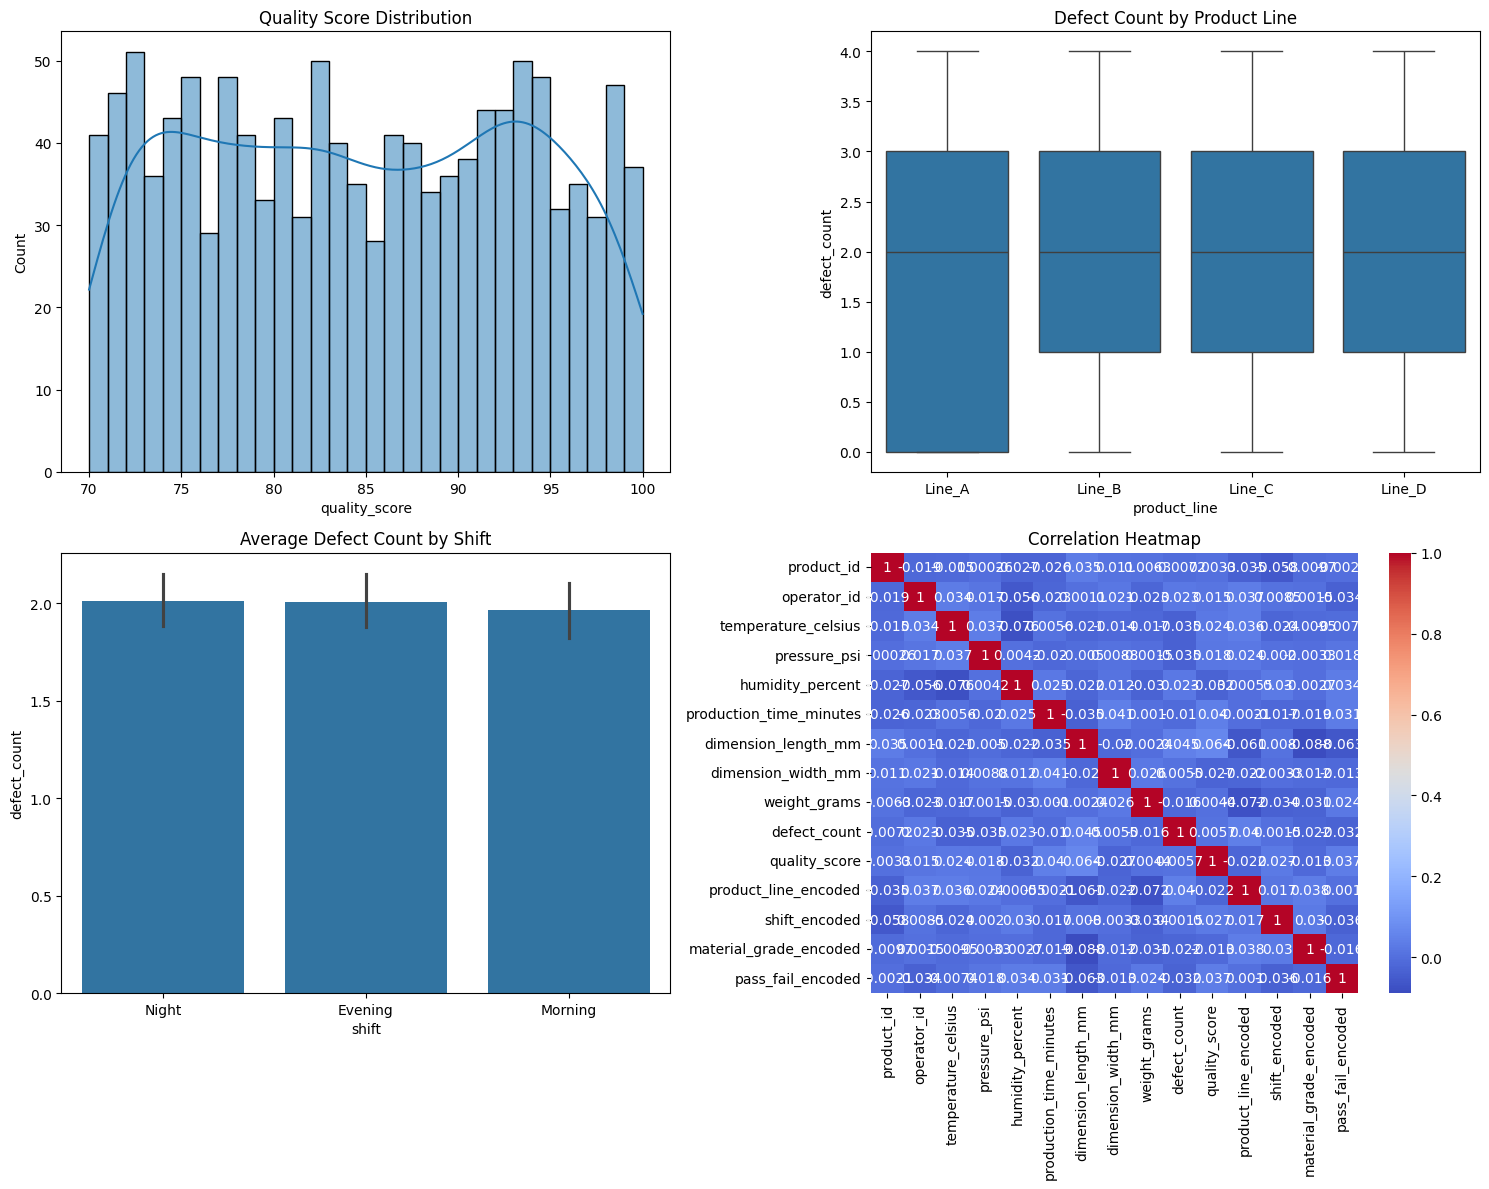

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 cols layout

# Plot 1: Quality Score Distribution
sns.histplot(df['quality_score'], bins=30, kde=True, ax=axes[0,0])
axes[0,0].set_title('Quality Score Distribution')

# Plot 2: Defect Count by Product Line
sns.boxplot(x='product_line', y='defect_count', data=df, ax=axes[0,1])
axes[0,1].set_title('Defect Count by Product Line')

# Plot 3: Average Defect Count by Shift
sns.barplot(x='shift', y='defect_count', data=df, ax=axes[1,0])
axes[1,0].set_title('Average Defect Count by Shift')

# Plot 4: Correlation Heatmap
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()